In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with xr.open_dataset('output/lmr_v21_avg_reg11.nc') as ds:
    dsm = ds.load()

with xr.open_dataset('output/lmr_v21_avg_hist_reg11.nc') as ds:
    dsh = ds.load()
    
with xr.open_dataset('output/lmr_online_avg_reg11.nc') as ds:
    dsmo = ds.load()

with xr.open_dataset('output/lmr_online_avg_hist_reg11.nc') as ds:
    dsho = ds.load()

In [3]:
with xr.open_dataset('work/out/modera_avg_reg11.nc') as ds:
    dsme = ds.load()

with xr.open_dataset('work/out/modera_avg_hist_reg11.nc') as ds:
    dshe = ds.load()

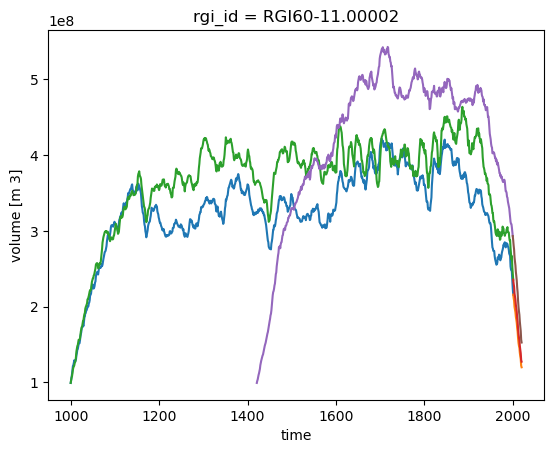

In [4]:
dsm.isel(rgi_id=1).volume.plot();
dsh.isel(rgi_id=1).volume.plot();

dsmo.isel(rgi_id=1).volume.plot();
dsho.isel(rgi_id=1).volume.plot();

dsme.isel(rgi_id=1).volume.plot();
dshe.isel(rgi_id=1).volume.plot();

In [5]:
dsh.isel(time=0).volume.isnull().sum().item()

134

In [6]:
dsho.isel(time=0).volume.isnull().sum().item()

171

In [7]:
dshe.isel(time=0).volume.isnull().sum().item()

220

In [8]:
valid_ids = ((~dsh.isel(time=0).volume.isnull().data) & 
            (~dsho.isel(time=0).volume.isnull().data) & 
            (~dshe.isel(time=0).volume.isnull().data))

In [9]:
for ens in range(0, 20):
    with xr.open_dataset(f'output/lmr_v21_ens/lmr_v21_ens{ens}_hist_reg11.nc') as ds:
        print(ds.isel(time=0).volume.isnull().sum().item())
        valid_ids = valid_ids & (~ds.isel(time=0).volume.isnull()).data

312
191
114
144
89
284
182
141
158
266
240
98
111
105
89
137
125
71
240
235


In [10]:
df = pd.read_csv('https://cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.6/L3-L5_files/2023.3/elev_bands/W5E5_spinup/RGI62/b_160/L5/summary/glacier_statistics_11.csv',
                 index_col=0)

In [11]:
valid_ids = dsm.sel(rgi_id=valid_ids).rgi_id.data

In [12]:
dfok = df.loc[valid_ids]

In [13]:
dfok.rgi_area_km2.sum() / df.rgi_area_km2.sum(), dfok.inv_volume_km3.sum() / df.inv_volume_km3.sum()

(0.9883091333014045, 0.9947479444505978)

In [14]:
dsm.volume.sel(rgi_id=valid_ids).isel(time=0).sum().item()*1e-9 / dfok.inv_volume_km3.sum() 

1.000010057767268

In [15]:
dfs = df[['rgi_region', 'rgi_subregion', 'name', 'cenlon', 'cenlat', 
          'rgi_area_km2', 'rgi_year', 'main_flowline_length', 'inv_volume_km3', 'reference_mb', 'reference_mb_err']]

In [16]:
dfs.to_csv('filtered_update/glacier_statistics_reg11.csv')

In [17]:
_dsm = xr.concat([dsm.sel(rgi_id=valid_ids).isel(time=slice(None, -1)), dsh.sel(rgi_id=valid_ids)], dim='time')
_dsmo = xr.concat([dsmo.sel(rgi_id=valid_ids).isel(time=slice(None, -1)), dsho.sel(rgi_id=valid_ids)], dim='time')
_dsme = xr.concat([dsme.sel(rgi_id=valid_ids).isel(time=slice(None, -1)), dshe.sel(rgi_id=valid_ids)], dim='time')

In [18]:
import seaborn as sns

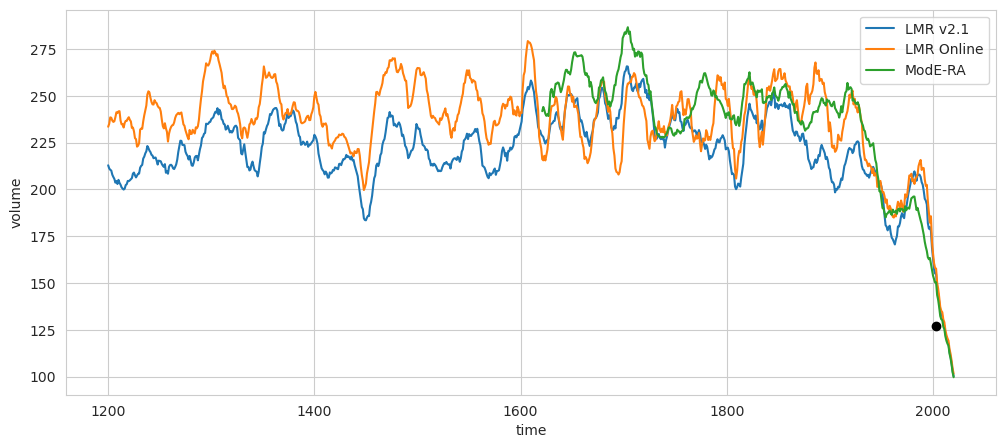

In [19]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(12, 5))
    (_dsm.volume.isel(time=slice(200, None)).sum(dim='rgi_id')*1e-9).plot(label='LMR v2.1');
    (_dsmo.volume.isel(time=slice(200, None)).sum(dim='rgi_id')*1e-9).plot(label='LMR Online');
    (_dsme.volume.isel(time=slice(200, None)).sum(dim='rgi_id')*1e-9).plot(label='ModE-RA');
    plt.plot(2003, dfok.inv_volume_km3.sum(), 'o', c='k');
    plt.legend();

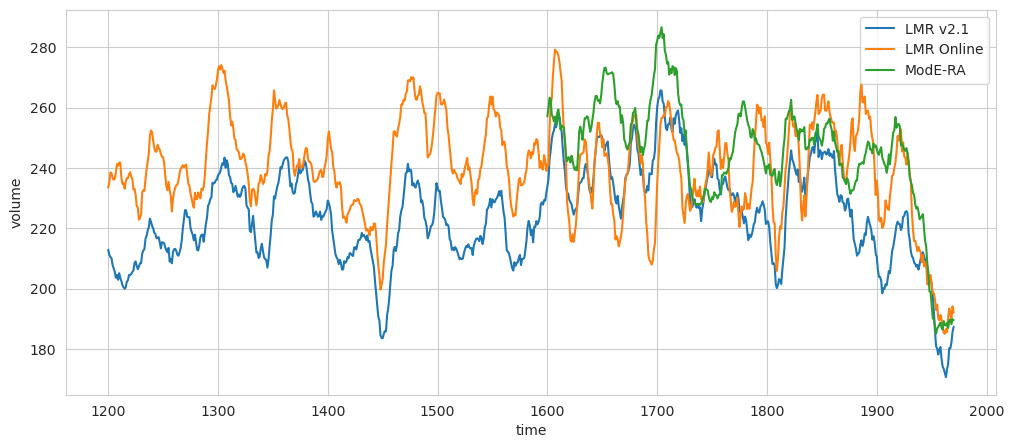

In [20]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(12, 5))
    (_dsm.volume.sel(time=slice(1200, 1970)).sum(dim='rgi_id')*1e-9).plot(label='LMR v2.1');
    (_dsmo.volume.sel(time=slice(1200, 1970)).sum(dim='rgi_id')*1e-9).plot(label='LMR Online');
    (_dsme.volume.sel(time=slice(1600, 1970)).sum(dim='rgi_id')*1e-9).plot(label='ModE-RA');
    # plt.plot(2003, dfok.inv_volume_km3.sum(), 'o', c='k');
    plt.legend();

In [21]:
_dsm.to_netcdf('filtered_update/lmr_v21_avg_reg11.nc')
_dsmo.to_netcdf('filtered_update/lmr_online_avg_reg11.nc')
_dsme.to_netcdf('filtered_update/modera_avg_reg11.nc')

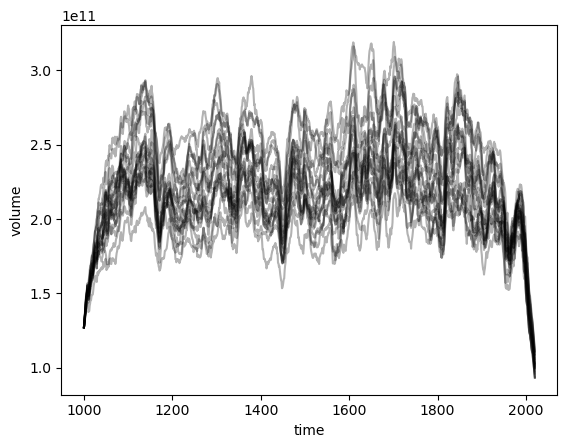

In [23]:
for ens in range(0, 20):
    with xr.open_dataset(f'output/lmr_v21_ens/lmr_v21_ens{ens}_hist_reg11.nc') as dsh:
        with xr.open_dataset(f'output/lmr_v21_ens/lmr_v21_ens{ens}_reg11.nc') as dse:
            ds = xr.concat([dse.sel(rgi_id=valid_ids).isel(time=slice(None, -1)), dsh.sel(rgi_id=valid_ids)], dim='time')
            ds.to_netcdf(f'filtered_update/ensemble_members/lmr_v21_ens{ens}_reg11.nc')
            
            ds.volume.sum(dim='rgi_id').plot(c='k', alpha=0.3);

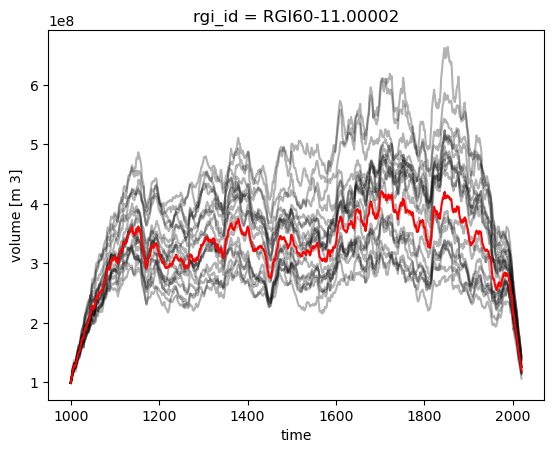

In [13]:

for ens in range(0, 20):

    with xr.open_dataset(f'output/lmr_v21_ens{ens}_reg11.nc') as ds:
        dsm = ds.load()
    with xr.open_dataset(f'output/lmr_v21_ens{ens}_hist_reg11.nc') as ds:
        dsh = ds.load()
    dsm.isel(rgi_id=1).volume.plot(c='k', alpha=0.3);
    dsh.isel(rgi_id=1).volume.plot(c='k', alpha=0.3);
    

with xr.open_dataset('output/lmr_v21_avg_reg11.nc') as ds:
    dsm = ds.load()
with xr.open_dataset('output/lmr_v21_avg_hist_reg11.nc') as ds:
    dsh = ds.load()
dsm.isel(rgi_id=1).volume.plot(c='r');
dsh.isel(rgi_id=1).volume.plot(c='r');

## ModERA 

In [3]:
with xr.open_dataset('work/out/modera_avg_reg11.nc') as ds:
    dsm = ds.load()

with xr.open_dataset('work/out/modera_avg_hist_reg11.nc') as ds:
    dsh = ds.load()

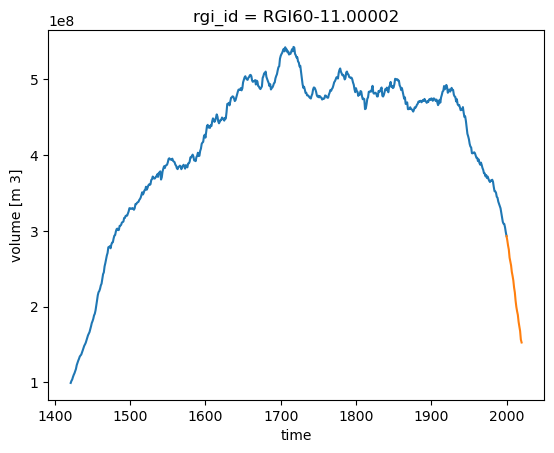

In [4]:
dsm.isel(rgi_id=1).volume.plot();
dsh.isel(rgi_id=1).volume.plot();